In [7]:
from matplotlib import pyplot as plt
import numpy as np
import os
import random
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import scale, MinMaxScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


# resample signal to n samples
from scipy.signal import resample

# XML parser
import xml.etree.ElementTree as ET

# encoding and normalizing data
from sklearn.preprocessing import LabelEncoder, StandardScaler

NUM_POINTS = 50

In [3]:
gestures = ['rectangle', 'delete_mark', 'pigtail']
data = []
labels = []

for root, subdirs, files in os.walk('dataset/xml_logs'):
    if 'ipynb_checkpoint' in root:
        continue
        
    if len(files) > 0:
        for f in files:
            if '.xml' in f:
                fname = f.split('.')[0]
                label = fname[:-2]
                    
                xml_root = ET.parse(f'{root}/{f}').getroot()
                    
                points = []
                for element in xml_root.findall('Point'):
                    x = element.get('X')
                    y = element.get('Y')
                    points.append([x, y])
                        
                points = np.array(points, dtype=float)
                    
                scaler = StandardScaler()
                points = scaler.fit_transform(points)
                    
                resampled = resample(points, 64)
                    
                if not label in labels and label in gestures:
                    data.append((label, resampled))
                    labels.append(label)

                if len(labels) == len(gestures):
                    print("all files loaded successfully", len(data))

print("all files loaded successfully", len(data))


all files loaded successfully 2


[('pigtail',
  array([[-1.961446  ,  0.86252153],
         [-2.29937285,  0.86386486],
         [-1.56843896,  0.92048999],
         [-1.76148613,  0.93138064],
         [-1.88324982,  0.90992505],
         [-1.53638684,  0.89086731],
         [-1.5838562 ,  0.89546924],
         [-1.60749658,  0.90273089],
         [-1.31249614,  0.88982666],
         [-1.26749684,  0.86674466],
         [-1.25044031,  0.82780329],
         [-1.02797495,  0.77993259],
         [-1.00890479,  0.76082159],
         [-1.03775582,  0.75159114],
         [-0.86176541,  0.71210939],
         [-0.75096726,  0.66658356],
         [-0.66327153,  0.62809042],
         [-0.48365899,  0.57624752],
         [-0.41819782,  0.53063657],
         [-0.36764835,  0.49563711],
         [-0.2052769 ,  0.44146199],
         [-0.13264647,  0.39479876],
         [-0.08179556,  0.35342774],
         [ 0.1227997 ,  0.22218185],
         [ 0.32562012,  0.02922162],
         [ 0.4440407 , -0.0756067 ],
         [ 0.5686927 , -0

In [8]:
labels = [sample[0] for sample in data]
print(set(labels))

encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

print(set(labels_encoded))
y = to_categorical(labels_encoded)
print(len(y[0]))

sequences = [sample[1] for sample in data]
X = np.array(sequences)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

{'pigtail', 'rectangle'}
{0, 1}
2
(1, 64, 2) (1, 64, 2) (1, 2) (1, 2)


In [19]:
def add_noise(sequence):
    noise = np.random.normal(0,0.08,sequence.shape)
    noise_seq = sequence + noise
    print(noise_seq[:3])
    return noise_seq

In [39]:
def scaling(sequence):
    centroid = np.mean(sequence)
    rnd = np.random.uniform(0.8, 1.2)
    points = sequence - centroid
    scaled_seq = points * rnd
    scaled_seq += centroid
    print("scale ", rnd)
    print("seq ", sequence[:5])
    print("scaled ", scaled_seq[:5])
    return scaled_seq

scale  0.839945167594964
seq  [[-1.961446    0.86252153]
 [-2.29937285  0.86386486]
 [-1.56843896  0.92048999]
 [-1.76148613  0.93138064]
 [-1.88324982  0.90992505]]
scaled  [[-1.64750709  0.72447079]
 [-1.93134712  0.72559911]
 [-1.31740272  0.77316112]
 [-1.47955176  0.78230867]
 [-1.58182659  0.76428715]]


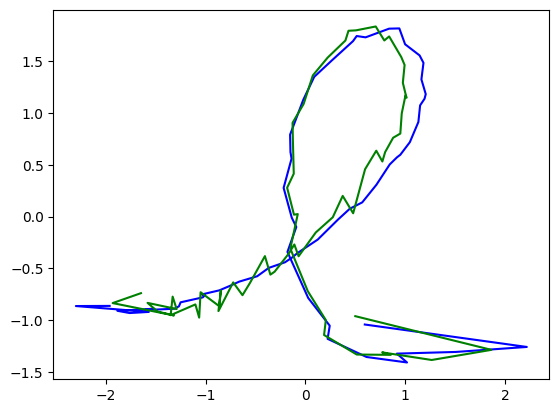

In [42]:
test_data = random.sample(data, 1)[0]

label = test_data[0]
sequence = test_data[1]

#noise_seq = add_noise(sequence)
scaled_seq = scaling(sequence)

plt.plot(sequence.T[0], sequence.T[1]*-1, 'b')
plt.plot(scaled_seq.T[0], noise_seq.T[1]*-1, 'g')
